# <center> les tenseurs numpy </center>

Rappelons que les liste sont des tableaux extensibles à volonté et qui peuvent contenir n'importe quoi. On les créer avec:

            unListe=[]

 Dans un cadre scientifique, on travaille essentiellement avec numpy qui créer des tenseurs (=tableau multi-dimensionnel):
* tenseur d'ordre 1 = vecteur, ex: pour stocker du son
* tenseur d'ordre 2 = matrice, ex: pour stocker une image
* tenseur d'ordre 3 = volume, ex: pour stocker une vidéo
* tenseur d'ordre 4 = très utile quand on fait du deep-learning

Ces tableau numpy ont une taille fixée à l'avance, et ne peuvent contenir qu'un seul type d'objet : int ou float



In [20]:
import numpy as np

On précise l'affichage des tableau numpy :
* 3 décimales après la virgule *
* on supprime la notation scientifique des nombres
* on veut de grandes lignes


In [30]:
np.set_printoptions(precision=3,suppress=True,linewidth=5000)


# type des données

Nous utiliserons essentiellement des tableaux contenant des flottant (64 bit) ou des d'entier (64 bit). 


### Tableau de flotant

In [13]:
"""un vecteur initialisé par une liste de valeurs. """
vec=np.array([1.,2,3,4])
"""une matrice"""
mat=np.array([ [1.,2,0],[3,4,0]])
"notez qu'on a mis au moins un coefficient flottant (avec un point)"

print("vec\n",vec)
print("mat\n",mat)

""" Les principales caractéristiques d'un tableau sont:"""
print("vec:",vec.dtype,vec.shape)
print("mat:",mat.dtype,mat.shape)



vec
 [ 1.  2.  3.  4.]
mat
 [[ 1.  2.  0.]
 [ 3.  4.  0.]]
vec: float64 (4,)
mat: float64 (2, 3)


In [14]:
#vecteur de flotant initialisé à 0, matrice de flottant initialisé à 1
vec_zero=np.zeros(shape=[5])
mat_un=np.ones(shape=[5,4])
print("\n vec_zero\n",vec_zero)
print("\n mat_un \n",mat_un)


 vec_zero
 [ 0.  0.  0.  0.  0.]

 mat_un 
 [[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


### Tableau d'entier

Dès qu'un tableau à vocation à stocer des indices il faut nécessairement que se soit un tableau d'entier. Dans le cas contraire, je vous conseille de toujours favoriser les tableau de flotant. 


In [15]:
indices=np.array([0,3,1])
vec = np.array([0.,2,4,6,8,10])
print(indices)
print(indices.dtype)
print(vec[indices])

[0 3 1]
int64
[ 0.  6.  2.]


In [16]:
#convertissons
vec=np.array([1.5,2.5,3.5,4.5])
print(vec," dtype:",vec.dtype)
vec=vec.astype(np.int64)
print(vec," dtype:",vec.dtype)
vec=vec.astype(np.float64)
print(vec," dtype:",vec.dtype)


[ 1.5  2.5  3.5  4.5]  dtype: float64
[1 2 3 4]  dtype: int64
[ 1.  2.  3.  4.]  dtype: float64


***Exo :*** changez `indices` pour qu'il contienne des flottant et lisez le message d'erreur qui en découle.  

# Opérations élément par élément

In [18]:
"""toutes ces opérations sur les tenseurs sont faites terme à terme."""

vec = np.array([1., 2, 3, 4])
vec_carre = vec**2
vec2= vec+vec_carre
vec3=7*vec
vec4=np.sin(vec)
vec5=vec2*vec3


print("vec",vec)
print("vec_carre",vec_carre)
print("vec2",vec2)
print("vec3",vec3)
print("vec4",vec4)
print("vec5",vec5)

vec [ 1.  2.  3.  4.]
vec_carre [  1.   4.   9.  16.]
vec2 [  2.   6.  12.  20.]
vec3 [  7.  14.  21.  28.]
vec4 [ 0.84147098  0.90929743  0.14112001 -0.7568025 ]
vec5 [  14.   84.  252.  560.]


Toutes ces fonctions numpy ne modifient par l'argument de départ (une 'copie' est faite). 

In [21]:
vec = np.array([1., 2, 3, 4])
vec1=vec**2
vec2=np.sin(vec)

print(vec.round())
print(vec1)
print(vec2)

"""vec n'a pas changer"""
print("vec",vec)

[ 1.  2.  3.  4.]
[  1.   4.   9.  16.]
[ 0.841  0.909  0.141 -0.757]
vec [ 1.  2.  3.  4.]


De nombreuses fonctions numpy peuvent s'utiliser avec deux syntaxes différentes : 
        
1. `np.fonction(tenseur)`
        
2. `tenseur.fonction()`

Et même dans le second cas, une copie du tenseur est faites ; c'est un peu trompeur car la syntaxe objet `tenseur.fonction()` suggère en générale une opération modifiant l'objet (opération "inPlace")

In [22]:
vec = np.array([1.1234, 2.1234, 3.1234, 4.1234])

"""arrondir"""
vec1= np.round(vec,1)
"""idem avec syntaxe différente"""
vec2= vec.round(1)

print("vec1", vec1)
print("vec2", vec2)


"""vec n'a pas changer (cependant il ne s'affiche qu'avec 3 décimales à cause de notre entête)"""
print("vec", vec)

vec1 [ 1.1  2.1  3.1  4.1]
vec2 [ 1.1  2.1  3.1  4.1]
vec [ 1.123  2.123  3.123  4.123]


# Modifier un tenseur

In [23]:
vec = np.array([1., 2, 3, 4])
mat = np.array([[1., 2], [3, 4]])

"""modifier un élément"""
vec[0] = 10.  # la numérotation commence à zéro
mat[1, 1] = 10.

""" attention, on a ainsi modifier les objets initiaux"""
print("vec et mat après modification")
print(vec)
print(mat)

"""modifier un bloc d'élément"""
vec_zero = np.zeros(shape=[5])
vec_zero[0:3]=5 # [0:3] indique les indices dans l'intervalle [0,3[

mat_un = np.ones(shape=[5, 4])
mat_un[0:2,0:3]=7

print("\nvec_zero\n", vec_zero)
print("\nmat_un\n", mat_un)

vec et mat après modification
[ 10.   2.   3.   4.]
[[  1.   2.]
 [  3.  10.]]

vec_zero
 [ 5.  5.  5.  0.  0.]

mat_un
 [[ 7.  7.  7.  1.]
 [ 7.  7.  7.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


Extraire une partie d'un tenseur puis la modifier.

In [26]:
mat_un = np.ones(shape=[5, 4])

part=mat_un[0:2, 0:3]
"""toute la partie est mise à 7"""
part[:,:]=7

"""et là, observez : c'est à la fois logique et surprenant:"""
print("\n mat_un\n", mat_un)
print("\n part\n", part)


 mat_un
 [[ 7.  7.  7.  1.]
 [ 7.  7.  7.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]

 part
 [[ 7.  7.  7.]
 [ 7.  7.  7.]]


Comment ça marche :

        mat_un = np.ones(shape=[5, 4])
        
L'ordi crée un tableau dans la mémoire de l'ordinateur. la variable 'mat_un' est une vue (=référence) sur ce tableau.
        
        part=mat_un[0:2, 0:3]
        
la variable 'part' est une vue sur une partie de ce tableau en mémoire. en effectuant :
        
        part[:,:]=7
        
on modifie une partie du tableau en mémoire. 

Par contre quand on fait :
        
        a=mat_un[0,0]
        
la variable `a` contient une copie du coefficient `mat_un[0,0]`. Modifier `a` ne modifie pas le tableau en mémoire. La preuve :

In [28]:
mat_un = np.ones(shape=[5, 4])
a=mat_un[0,0]
a=7
print('a=',a)
print("\n mat_un\n", mat_un)

a= 7

 mat_un
 [[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


***Exo :*** Que sont les tenseurs a,b,c,.... ci-dessous ?
Mettez la réponse sur du papier, faites bien la différence entre les vecteurs et les matrices
puis vérifiez avec un `print`
Indiquez pour chaque cas, s'il s'agit d'un nombre, d'un vecteur ou d'une matrice.

In [33]:
"""remplissons une matrice par une double boucle"""
nbLigne = 3
nbColonne = 4
mat = np.zeros([nbLigne, nbColonne])
for i in range(nbLigne):
    for j in range(nbColonne):
        mat[i, j] = i + j

print("\nmat \n",mat)

a = mat[0, :]
aBis = mat[0:1, :]
b = mat[:,0]
c = mat[:, nbColonne - 1]
d = mat[:,  - 1]  # ça: c'est idem que la ligne précédente
e = mat[-1,-1]
f = mat[0:2,:]
g = mat[0:2, 0:1]


mat 
 [[ 0.  1.  2.  3.]
 [ 1.  2.  3.  4.]
 [ 2.  3.  4.  5.]]


# Sélection par valeurs et par indices

# Application :  loi forte des grands nombres

Illustrons graphiquement la loi forte des grands nombres.
On montre que : plus on moyenne de va, et plus on se rapproche de l'espérance. 

Mathématiquement : 
Soit (X_n) une suite de v.a, qui admet une espérance : 

	lim_n 1/n (X_1+....+X_n) =  E[X_1]

Remarque : pour illustrer ce théorème, on va traver la courbe 

	n -> 1/n (X_1+....+X_n)

mais on n'est pas obligé de l'évaluer pour tous les n (on peut aller par exemple par pas de 40)



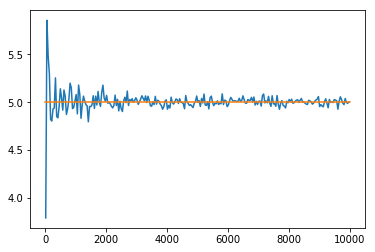

In [11]:
import matplotlib.pyplot as plt
% matplotlib inline

""" np.arange c'est comme range() sauf que cela donne un tableau numpy"""
n_max=10000
ns=np.arange(10,n_max,40)
means=[]
for n in ns:
    simus=np.random.uniform(0,10,size=n)
    means.append(np.mean(simus))

plt.plot(ns,means)
plt.plot([0,n_max],[5,5])
plt.show()

Mais j'ai volontairement fait une erreur dans le programme précédent, une erreur que font beaucoup d'étudiant chaque année : 
Écrivez précisément la loi des grands nombre, comparez cet énoncé avec le programme ci-dessus.
Trouvez le bug mathématique.

# Application : moyenne et écart-type

In [34]:
nbData=10
X1=np.random.random(size=nbData)
X2=np.random.normal(size=nbData)

"""calculons leur moyenne, qu'on peut  appeler : mu_hat (mu pour espérance, et hat pour estimation)
calculons leur écart type empirique : si_hat (si pour écart type, et hat pour estimation)
La formule écart type empirique  est ...  """

print("loi uniforme sur [0,1]")
print("mu_hat",X1.mean())
print("si_hat",X1.std())

print("loi normale")
print("mu_hat", X2.mean())
print("si_hat", X2.std())

loi uniforme sur [0,1]
mu_hat 0.443704816306
si_hat 0.272584497045
loi normale
mu_hat 0.0680259714359
si_hat 1.20482403032


Vérifiez expérimentallement les résultats suivants:
* l'espérance de la somme de deux variables aléatoires est  ...
* la variance de la somme de deux variables aléatoires indépendantes est ...
 
* soientt X une va, a et b des constantes. 
$$
\mathbf E[aX+b]= ...
$$
$$
\mathbf V[aX+b]= ...
$$